In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
dates = session.query(measurement).all()
dates[-1].__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2e62c3b37c0>,
 'date': '2017-08-23',
 'tobs': 76.0,
 'id': 19550,
 'prcp': 0.45,
 'station': 'USC00516128'}

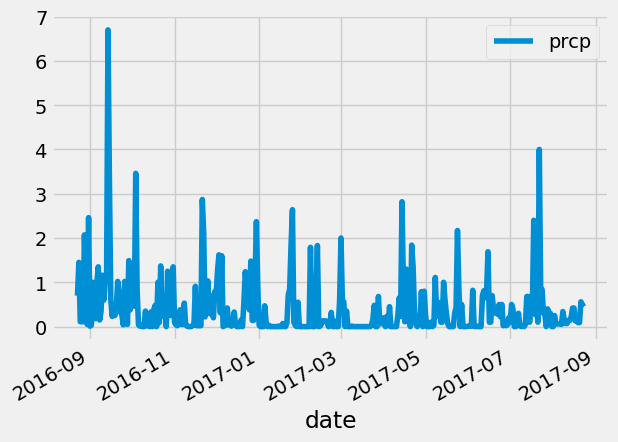

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
dates[-1].date # '2017-08-23'


# Calculate the date one year from the last date in data set.
year_ago = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
year_ago # datetime.datetime(2016, 8, 23, 0, 0)

# Perform a query to retrieve the data and precipitation scores
session.query(measurement.date, measurement.prcp).order_by(measurement.id.desc()).limit(349).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
query_results = session.query(measurement.date, measurement.prcp).order_by(measurement.id.desc()).limit(349).all()
df = pd.DataFrame(query_results, columns=['date', 'prcp'])


# Sort the dataframe by date
df = df.sort_values(by='date')

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
type(df['date'][0])
df.set_index('date', inplace=True)
df = df.ffill()
# df

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(column=['prcp'])
# plt.tight_layout()
plt.show()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,349.000000
mean,0.426074
std,0.702073
min,0.000000
25%,0.000000
50%,0.130000
75%,0.560000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
query_results = session.query(measurement.station).order_by(measurement.id.desc()).all()
len(query_results)

19550

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
query_results = session.query(measurement.date, measurement.station, measurement.tobs).order_by(measurement.id.desc()).all()
df = pd.DataFrame(query_results, columns=['date','station', 'temp'])
df['station'].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station = df[df['station'] == 'USC00519281']['temp']
station_min = str(station.min())
station_max = str(station.max())
station_avg = str(station.mean())
print('Min Temp: ' + station_min + ', Max Temp: ' + station_max + ', Avg Temp: ' + station_avg)

Min Temp: 54.0, Max Temp: 85.0, Avg Temp: 71.66378066378067


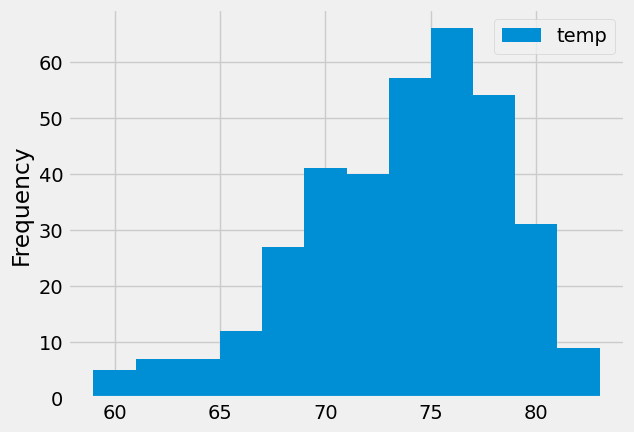

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_results = session.query(measurement.date, measurement.station, measurement.tobs).order_by(measurement.id.desc()).all()
df = pd.DataFrame(query_results, columns=['date','station', 'temp'])
station = df[df['station'] == 'USC00519281']
station = station[0:356]
station.plot.hist(column=['temp'], bins=12);

# Close session

In [16]:
# Close Session
session.close()